In [8]:
import pandas as pd
import matplotlib
matplotlib.rc('font',size=8)
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=pd.core.common.SettingWithCopyWarning)

%matplotlib inline

In [2]:
# I use the Johns Hopkins Covid dataset for most of my data
# https://github.com/CSSEGISandData/COVID-19/
# Here I'm hiding my import and cleaning of the data since it also reveals my local directories
# covid_support is an ignored file on this repo
# covid_support compiles the daily files from JH data and edits/cleans
from covid_support import combine, cols, states, state_info
today = pd.datetime.today().strftime('%Y-%m-%d')
latest_data = combine.index.max().strftime('%Y-%m-%d')
print("Dashboard updated:\t{} \nLatest Data:\t\t{}".format(today,latest_data))

Dashboard updated:	2021-01-29 
Latest Data:		2021-01-28


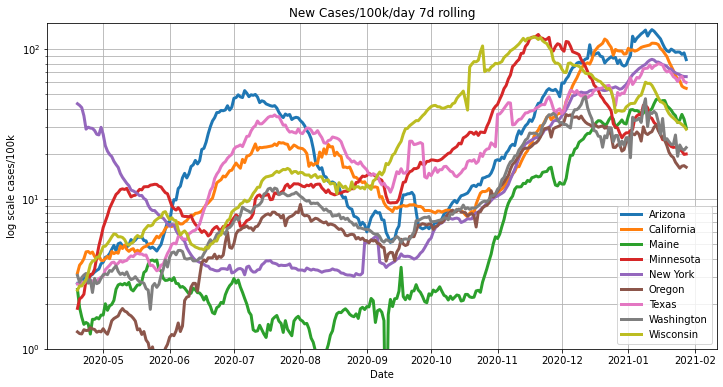

In [5]:
# Select AZ, CA, ME, NY OR,TX WA, WI
state_info = state_info.iloc[[0,1,7,8,9,12,14,15,16]]
# New Cases Per Capita
plt.figure(figsize=(12,6))
for i,r in state_info.iterrows():
    new_cases_per_pop = combine['Confirmed',r['State']].diff().rolling(7).mean()/(r['Pop']/1e5)
    plt.plot(combine.index, new_cases_per_pop,linewidth=3, label=r['State'])
plt.title('New Cases/100k/day 7d rolling')
plt.yscale('log')
plt.ylabel('log scale cases/100k')
plt.xlabel('Date')
plt.ylim(1e0,15e1)
plt.legend()
plt.grid(which='both')

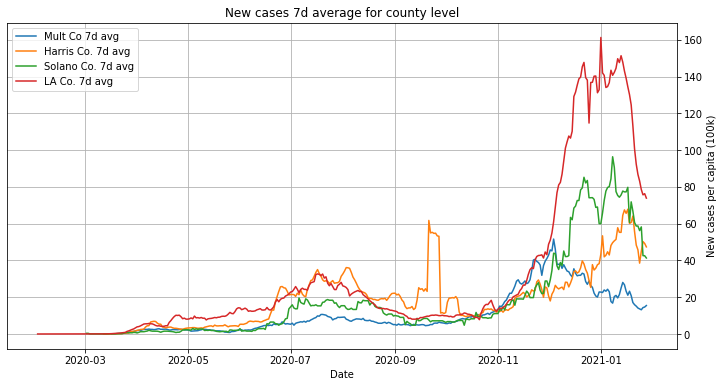

In [9]:
county_data = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
df = pd.read_csv(county_data, parse_dates=[0])

mult_pop = 812855   # 2019 pop
har_pop = 4.713e6
sol_pop = 447643
la_pop = 10.04e6

mult = df[df['county']=="Multnomah"]
mult.index = mult.date
mult['new_cases'] = mult['cases'].diff()
mult['smooth'] = mult['new_cases'].rolling(7).mean()
har = df[(df['county']=="Harris") & (df['state']=="Texas")]
har.index = har.date
har['new_cases'] = har['cases'].diff()
har['smooth'] = har['new_cases'].rolling(7).mean()
sol = df[df['county']=="Solano"]
sol.index = sol.date
sol['new_cases'] = sol['cases'].diff()
sol['smooth'] = sol['new_cases'].rolling(7).mean()
la = df[df['county']=="Los Angeles"]
la.index = la.date
la['new_cases'] = la['cases'].diff()
la['smooth'] = la['new_cases'].rolling(7).mean()

# Cases per capita on one plot
plt.figure(figsize=(12,6))
plt.plot(mult.index, mult.smooth*1e5/mult_pop, label='Mult Co 7d avg')
plt.plot(har.index, har.smooth*1e5/har_pop, label='Harris Co. 7d avg')
plt.plot(sol.index, sol.smooth*1e5/sol_pop, label='Solano Co. 7d avg')
plt.plot(la.index, la.smooth*1e5/la_pop, label='LA Co. 7d avg')
#plt.plot(ri.index, ri.smooth*1e5/ri_pop, label='Prov Co. 7d avg')
plt.xlabel('Date')
plt.ylabel('New cases per capita (100k)')
plt.title('New cases 7d average for county level')
plt.grid(which='both')
plt.legend()
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

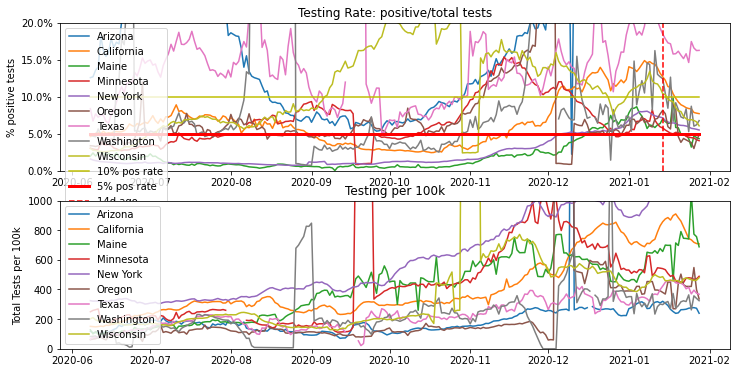

In [11]:
# Testing Rates
combine = combine['6/1/2020':]

for sub in [state_info]:
    td = combine.index[-1]
    plt.figure(figsize=(12,6))
    plt.subplot(2,1,1)
    for i,r in sub.iterrows():
        new_cases_per_pop =  combine['Confirmed',r['State']].diff().rolling(7).mean()/(r['Pop']/1e5)
        new_tests_per_pop = combine['Testing_Rate',r['State']].diff().rolling(7).mean()
        new_tests_per_pop[new_tests_per_pop <0] = np.nan
        perc_test_pos = new_cases_per_pop/new_tests_per_pop
        plt.plot(combine.index, perc_test_pos, label=r['State'])
    plt.plot((pd.datetime(2020,6,8),td),(0.1,0.1), label='10% pos rate', c='y')
    plt.plot((pd.datetime(2020,6,8),td),(0.05,0.05), linewidth=3, label='5% pos rate', c='r')
    plt.plot([td - pd.Timedelta('14D')]*2,[0,0.2],'--',c='r',label='14d ago')
    plt.ylim(0,0.2)
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    plt.title("Testing Rate: positive/total tests")
    plt.ylabel("% positive tests")
    plt.legend(loc='upper left')
    # Testing Rates
    #plt.figure(figsize=(16,8))
    plt.subplot(2,1,2)
    for i,r in sub.iterrows():
        new_tests_per_pop = combine['Testing_Rate',r['State']].diff().rolling(7).mean()
        new_tests_per_pop[new_tests_per_pop <0] = np.nan
        plt.plot(combine.index, new_tests_per_pop, label=r['State'])
    plt.ylim(0,1000)
    plt.title("Testing per 100k")
    plt.ylabel('Total Tests per 100k')
    plt.legend(loc='upper left')